FINANCIAL PERFORMANCE COMPARISON OF TECH GIANTS
(Apple vs Microsoft vs Google)

Objective- 
Analyze and compare the financial health and performance trends of Apple,Microsoft, and Google over the last 5 years to provide investment insights or operational recommendations.

Scope-
We focus on a consistent 5-year window using annual financial statements (Income Statement, Balance Sheet, Cash Flow) and optionally—market data (prices/returns). We’ll standardize units/currency and align fiscal-year differences where relevant.

In [ ]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


Market Performance Baseline: Apple (AAPL)

Before comparing financial statements across Apple, Microsoft, and Alphabet, we first examine Apple’s 5-year price trend as a baseline for investor-facing performance and risk.

In [37]:
import yfinance as yf 

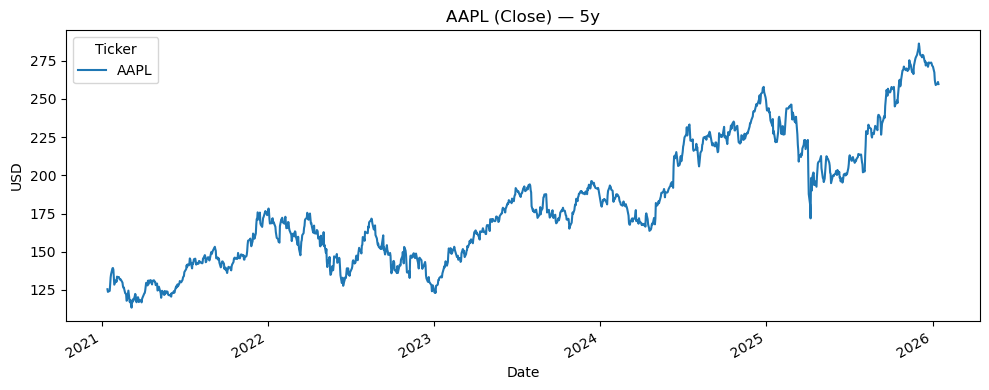

In [38]:
import yfinance as yf
import matplotlib.pyplot as plt

df = yf.download("AAPL", period="5y", interval="1d", auto_adjust=True, progress=False)

# choose a price column that exists
price_col = next((c for c in ["Adj Close", "Close"] if c in df.columns), None)
if price_col is None:
    raise ValueError(f"No price column found. Columns: {list(df.columns)}")

ax = df[price_col].plot(title=f"AAPL ({price_col}) — 5y", figsize=(10,4))
ax.set_ylabel("USD")
plt.tight_layout(); 
plt.show()


Market Performance Baseline:  Msft (MSFT)

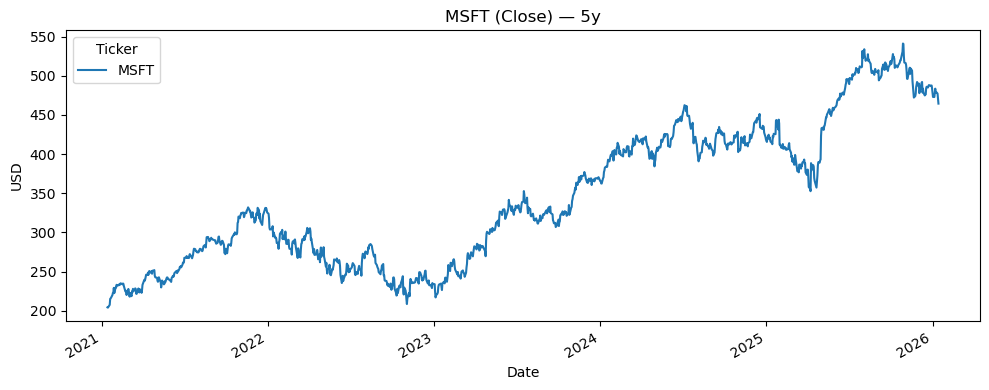

In [39]:
df= yf.download("MSFT", period="5y", interval="1d", auto_adjust=True, progress=False)

import yfinance as yf
import matplotlib.pyplot as plt

df = yf.download("MSFT", period="5y", interval="1d", auto_adjust=True, progress=False)

# choose a price column that exists
price_col = next((c for c in ["Adj Close", "Close"] if c in df.columns), None)
if price_col is None:
    raise ValueError(f"No price column found. Columns: {list(df.columns)}")

ax = df[price_col].plot(title=f"MSFT ({price_col}) — 5y", figsize=(10,4))
ax.set_ylabel("USD")
plt.tight_layout(); 
plt.show()


Market Performance Baseline: Goog (GOOG)

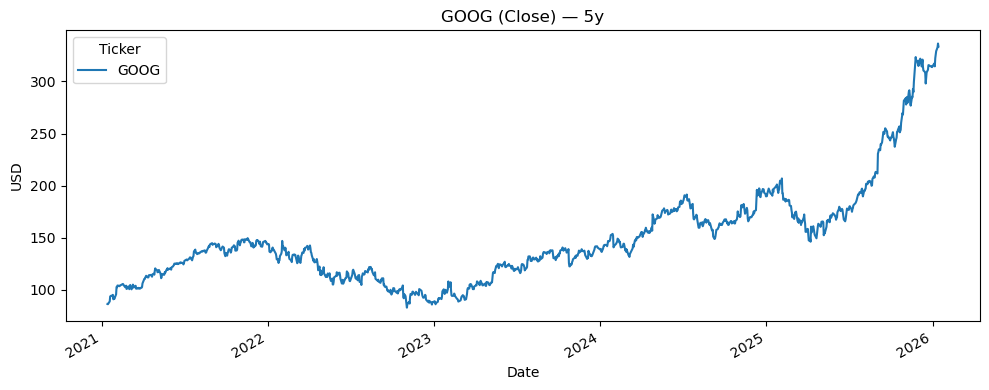

In [40]:
df= yf.download("GOOG", period="5y", interval="1d", auto_adjust=True, progress=False)

import yfinance as yf
import matplotlib.pyplot as plt

df = yf.download("GOOG", period="5y", interval="1d", auto_adjust=True, progress=False)

# choose a price column that exists
price_col = next((c for c in ["Adj Close", "Close"] if c in df.columns), None)
if price_col is None:
    raise ValueError(f"No price column found. Columns: {list(df.columns)}")

ax = df[price_col].plot(title=f"GOOG ({price_col}) — 5y", figsize=(10,4))
ax.set_ylabel("USD")
plt.tight_layout(); 
plt.show()


In [41]:
df = yf.download("AAPL",start="2020-01-01", end="2025-08-13",interval="1d", auto_adjust=True, progress=False)
df.to_csv("AAPL_2020_to_today_daily.csv")

In [42]:
df = yf.download("MSFT",
                 start="2020-01-01", end="2025-08-13",
                 interval="1d", auto_adjust=True, progress=False)
df.to_csv("MSFT_2020_to_today_daily.csv")

In [43]:
df = yf.download("GOOG",
                 start="2020-01-01", end="2025-08-13",
                 interval="1d", auto_adjust=True, progress=False)
df.to_csv("GOOG_2020_to_today_daily.csv")

In [44]:
import pandas as pd

In [45]:
#define tickers
tickers= ['AAPL','MSFT','GOOG']

In [46]:
#Pull financials
data={}
for ticker in tickers:
    stock= yf.Ticker(ticker)
    financials=stock.financials.T

In [47]:
#Income statement
balance_sheet=stock.balance_sheet.T
cash_flow=stock.cashflow.T
data[ticker]={'financials': financials, 'balance_sheet':balance_sheet, 'cash_flow':cash_flow}
print(f"downloaded data for {ticker}")

downloaded data for GOOG


In [48]:
df_all= yf.download(
    tickers,
    period="5y",            # or: start="2020-01-01", end="2025-08-13"
    interval="1d",
    auto_adjust=True,
    progress=False,
    group_by="ticker"       # makes columns per ticker
)

In [49]:
df_all.to_csv("prices_5y_daily_APPL_MSFT_GOOG.csv")

In [50]:
for t in tickers:
    df_all[t].to_csv(f"{t}_5y_daily.csv")
    print(t, df_all[t].shape)

AAPL (1256, 5)
MSFT (1256, 5)
GOOG (1256, 5)


In [51]:
df_all = yf.download(
    ["AAPL","MSFT","GOOG"],
    start="2020-01-01", end="2025-08-13",
    interval="1d", auto_adjust=True, progress=False, group_by="ticker"
)

In [52]:
print(df_all.columns.levels)

[['AAPL', 'GOOG', 'MSFT'], ['Close', 'High', 'Low', 'Open', 'Volume']]


In [53]:
from pathlib import Path

## Collect Financial Statements (Income, Balance Sheet, Cash Flow)

In this, we retrieve the latest available annual financial statements for Apple (AAPL), Microsoft (MSFT), and Alphabet/Google (GOOG) using yfinance.
We store each statement in a structured dictionary and export it as CSV files, ensuring that the rest of the analysis is reproducible and can be rerun without redownloading the data every time.


In [54]:
import yfinance as yf
import pandas as pd

# Define tickers
tickers = ["AAPL", "MSFT", "GOOG"]

# Pull annual statements into a dict
data = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)

    financials = stock.financials.T if stock.financials is not None else pd.DataFrame()
    balance_sheet = stock.balance_sheet.T if stock.balance_sheet is not None else pd.DataFrame()
    cashflow = stock.cashflow.T if stock.cashflow is not None else pd.DataFrame()  # note: cashflow

    data[ticker] = {
        "financials": financials,
        "balance_sheet": balance_sheet,
        "cashflow": cashflow,
    }

    print(
        f"Downloaded {ticker}: "
        f"financials={financials.shape if not financials.empty else 'EMPTY'}, "
        f"balance_sheet={balance_sheet.shape if not balance_sheet.empty else 'EMPTY'}, "
        f"cashflow={cashflow.shape if not cashflow.empty else 'EMPTY'}"
    )


Downloaded AAPL: financials=(5, 39), balance_sheet=(5, 69), cashflow=(5, 53)
Downloaded MSFT: financials=(4, 47), balance_sheet=(5, 78), cashflow=(5, 59)
Downloaded GOOG: financials=(4, 48), balance_sheet=(4, 75), cashflow=(4, 55)


In [55]:
print(df.shape)        # rows, cols
print(df.index[:5])    # first dates
print(df.columns)      # columns
display(df.head())     # first 5
display(df.tail())     # last 5
display(df.sample(4)) # random 10
df.info()              # dtypes + non-null counts
df.describe()          # numeric summary

(1410, 5)
DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08'],
              dtype='datetime64[ns]', name='Date', freq=None)
MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2020-01-02,67.859535,67.897747,66.578146,66.578146,28132000
2020-01-03,67.526535,68.114131,66.776363,66.891300,23728000
2020-01-06,69.191559,69.305201,66.997512,66.997512,34646000
2020-01-07,69.148376,69.627283,69.001476,69.376668,30054000
2020-01-08,69.693283,70.053580,69.024297,69.085832,30560000


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2025-08-06,196.615875,197.075172,194.166661,194.948456,15383700
2025-08-07,196.975311,198.063624,194.918495,197.404655,14660600
2025-08-08,201.777878,203.115805,197.594347,197.674225,24379900
2025-08-11,201.318604,201.847784,199.491428,201.243707,16690200
2025-08-12,203.844696,204.813199,201.088949,201.782883,19854000


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2020-10-08,73.743423,73.945407,72.709180,72.709180,23756000
2024-03-01,137.052094,138.957799,136.947879,138.570703,28551500
2021-10-14,140.359283,140.597002,138.301718,138.910146,21426000
2021-05-03,118.866974,120.084345,118.337445,119.241666,33788000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2020-01-02 to 2025-08-12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   1410 non-null   float64
 1   (High, GOOG)    1410 non-null   float64
 2   (Low, GOOG)     1410 non-null   float64
 3   (Open, GOOG)    1410 non-null   float64
 4   (Volume, GOOG)  1410 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 66.1 KB


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,1410.000000,1410.000000,1410.000000,1410.000000,1.410000e+03
mean,125.247503,126.634882,123.827570,125.161919,2.705311e+07
std,35.995561,36.302364,35.710023,36.019927,1.253032e+07
min,52.437710,53.167239,50.299545,52.432248,6.809800e+06
25%,97.330021,98.791550,96.024798,97.171196,1.873062e+07
50%,126.796516,128.900226,125.564244,127.010884,2.412400e+07
75%,148.820778,150.701104,147.523536,149.158788,3.181355e+07
max,206.904510,207.890662,203.467877,203.706952,9.779860e+07


In [56]:
import os
BASE = "Financial Performance"                                # change if you want
os.makedirs(BASE, exist_ok=True)
df.to_csv(os.path.join(BASE, "AAPL_5y_daily.csv"))


In [57]:
import glob, os
print("Data folder:", os.path.abspath("Finance Performance"))
print("Files:", glob.glob("Finance Performance/*.csv"))


Data folder: d:\fp\Finance Performance
Files: []


In [58]:
import glob, os
print("Drives root listing:", glob.glob(r"D:\*"))   # confirm D: is real
print("Exists C src?", os.path.exists(r"C:\Users\visha\Finance Performance"))
print("Exists D dest?", os.path.exists(r"D:\Finance Performance"))


Drives root listing: ['D:\\System Volume Information', 'D:\\\xa0', 'D:\\PartA_Program2.xlsx', 'D:\\PartA_Program3.xlsx', 'D:\\PartA_Program4.xlsx', 'D:\\PartA_Program5.xlsx', 'D:\\PartA_program6.xlsx', 'D:\\DA lab', 'D:\\OS (C) - Shortcut.lnk', 'D:\\project', 'D:\\Srinidhi', 'D:\\passport', 'D:\\Anaconda', 'D:\\Downloads', 'D:\\Skin cancer', 'D:\\Headache', 'D:\\HTML', 'D:\\dobos', 'D:\\FINAL', 'D:\\Videos', 'D:\\cherry', 'D:\\New folder', 'D:\\GitHub', 'D:\\6th sem.pdf', 'D:\\cc.pdf', 'D:\\new_parent', 'D:\\Financial Performance', 'D:\\HDFC INS_compressed.pdf', 'D:\\Financial-Performance-', 'D:\\IMG-20251008-WA0003.jpg', 'D:\\IMG-20251008-WA0002.jpg', 'D:\\IMG-20251008-WA0001.jpg', 'D:\\IMG-20251008-WA0005.jpg', 'D:\\fp']
Exists C src? False
Exists D dest? False


In [59]:
import os, shutil

d_path = r"D:\Financial Performance"   # use the exact name shown in your listing
print("Exists on D:", os.path.exists(d_path))
print("Sample contents:", os.listdir(d_path)[:10])


Exists on D: True
Sample contents: ['AAPL_5y_daily.csv', 'clean', 'Finance Performance .py', 'Finance Performance  (1).ipynb', 'New folder']


In [60]:
import os, glob
import pandas as pd
import numpy as np

# ====== 0) Set base folders ======
BASE = r"D:\Financial Performance"             # <-- change if needed
CLEAN = os.path.join(BASE, "clean")
os.makedirs(CLEAN, exist_ok=True)
assert os.path.isdir(BASE), f"Base folder not found: {BASE}"

# ====== helpers ======
def _coerce_numeric(col: pd.Series) -> pd.Series:
    s = col.astype(str)
    is_pct = s.str.contains("%", na=False).any()
    s = s.str.replace(",", "", regex=False)\
         .str.replace(r"[$€£₹]", "", regex=True)\
         .str.replace(r"[^\d\.\-eE+]", "", regex=True)
    out = pd.to_numeric(s, errors="coerce")
    return out / 100 if is_pct else out

def clean_price_df(df: pd.DataFrame) -> pd.DataFrame:
    # Date handling
    if "Date" in df.columns: df = df.set_index("Date")
    df.index = pd.to_datetime(df.index, errors="coerce")
    df = df.sort_index()
    df = df[~df.index.duplicated(keep="last")]
    # numerics
    for c in df.columns: df[c] = pd.to_numeric(df[c], errors="coerce")
    # choose price column
    price_col = "Adj Close" if "Adj Close" in df.columns else ("Close" if "Close" in df.columns else None)
    if price_col is None: raise ValueError("No Adj Close/Close in prices")
    # returns
    df["ret_d"] = df[price_col].pct_change()
    # month-end return aligned to month end
    m_end = df[price_col].resample("M").last()
    df["ret_m"] = m_end.reindex(df.index).ffill().pct_change()
    return df

def clean_financials_df(df: pd.DataFrame) -> pd.DataFrame:
    # index are periods (after your earlier .T), try making them datetimes
    if df.index.name is None or df.index.name.lower() != "period":
        df.index.name = "Period"
    try:
        df.index = pd.to_datetime(df.index, errors="coerce")
    except Exception:
        pass
    df = df.sort_index()
    # coerce numerics
    for c in df.columns:
        df[c] = _coerce_numeric(df[c]) if df[c].dtype == object else pd.to_numeric(df[c], errors="coerce")
    # standard fields (only keep those present)
    rename = {
        "Total Revenue": "revenue",
        "Net Income": "net_income",
        "Gross Profit": "gross_profit",
        "Operating Income": "oper_income",
    }
    present = {k:v for k,v in rename.items() if k in df.columns}
    if present:
        df2 = df[list(present.keys())].rename(columns=present).copy()
    else:
        df2 = df.copy()
    # metrics
    if "revenue" in df2: df2["revenue_yoy"] = df2["revenue"].pct_change()
    if "net_income" in df2 and "revenue" in df2: df2["net_margin"] = df2["net_income"] / df2["revenue"]
    if "gross_profit" in df2 and "revenue" in df2: df2["gross_margin"] = df2["gross_profit"] / df2["revenue"]
    if "oper_income" in df2 and "revenue" in df2: df2["oper_margin"] = df2["oper_income"] / df2["revenue"]
    return df2

written = []

# ====== 1) Clean PRICE CSVs ======
price_files = glob.glob(os.path.join(BASE, "**", "*_daily.csv"), recursive=True)
for p in price_files:
    try:
        df = pd.read_csv(p, parse_dates=["Date"]) if "Date" in pd.read_csv(p, nrows=0).columns else pd.read_csv(p)
        df_clean = clean_price_df(df)
        out = os.path.join(CLEAN, os.path.splitext(os.path.basename(p))[0] + "_clean.csv")
        df_clean.to_csv(out)
        written.append(out)
    except Exception as e:
        print(f"[PRICE][SKIP] {p}: {e}")

# ====== 2) Clean FINANCIALS CSVs ======
fin_patterns = ["*_financials.csv", "*_balance_sheet.csv", "*_cashflow.csv", "*_cash_flow.csv"]
fin_files = []
for pat in fin_patterns:
    fin_files += glob.glob(os.path.join(BASE, "**", pat), recursive=True)

for p in sorted(set(fin_files)):
    try:
        df = pd.read_csv(p, index_col=0)
        df_clean = clean_financials_df(df)
        out = os.path.join(CLEAN, os.path.splitext(os.path.basename(p))[0] + "_clean.csv")
        df_clean.to_csv(out)
        written.append(out)
    except Exception as e:
        print(f"[FIN][SKIP] {p}: {e}")

print(f"\nWrote {len(written)} cleaned files to:\n{CLEAN}")
for w in written[:10]:
    print(" -", w)
if len(written) > 10:
    print(" ...")


[PRICE][SKIP] D:\Financial Performance\AAPL_5y_daily.csv: No Adj Close/Close in prices

Wrote 0 cleaned files to:
D:\Financial Performance\clean


In [61]:
import pandas as pd
p = r"D:\Financial Performance\AAPL_5y_daily.csv"
hdr = pd.read_csv(p, nrows=5)
print("Columns:", list(hdr.columns))
print(hdr.head(2))


Columns: ['Unnamed: 0', 'Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt', 'Issuance Of Debt', 'Capital Expenditure', 'Income Tax Paid Supplemental Data', 'End Cash Position', 'Beginning Cash Position', 'Effect Of Exchange Rate Changes', 'Changes In Cash', 'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities', 'Net Other Financing Charges', 'Proceeds From Stock Option Exercised', 'Cash Dividends Paid', 'Common Stock Dividend Paid', 'Net Common Stock Issuance', 'Common Stock Payments', 'Net Issuance Payments Of Debt', 'Net Long Term Debt Issuance', 'Long Term Debt Payments', 'Long Term Debt Issuance', 'Investing Cash Flow', 'Cash Flow From Continuing Investing Activities', 'Net Other Investing Changes', 'Net Investment Purchase And Sale', 'Sale Of Investment', 'Purchase Of Investment', 'Net Business Purchase And Sale', 'Purchase Of Business', 'Net PPE Purchase And Sale', 'Purchase Of PPE', 'Operating Cash Flow', 'Cash Flow From Continuing Operating A

Turn messy Yahoo Finance statement dumps into one clean comparison table

-To analyze and plot 
-Setting the companies and output folder 
-Converting the statement dates and sorting them 
-Aligning the statements on the same set of years 
-Create key metrics into one table 
-Save as .csv file 

In [62]:
import os, pandas as pd, numpy as np, yfinance as yf

# ---- configure ----
TICKERS = ["AAPL","MSFT","GOOG"]                       # add more
OUTDIR  = r"D:\Financial Performance\clean"            # where to save
os.makedirs(OUTDIR, exist_ok=True)

# column name fallbacks by metric (Yahoo labels vary)
COLS = {
    "revenue": ["Total Revenue","Revenue"],
    "net_income": ["Net Income","Net Income Common Stockholders","Net Income Applicable To Common Shares"],
    "gross_profit": ["Gross Profit"],
    "total_assets": ["Total Assets"],
    "shareholders_equity": ["Total Stockholder Equity","Total Stockholders Equity","Stockholders Equity","Total Equity"],
    "operating_cash_flow": [
        "Operating Cash Flow",
        "Cash Flow From Continuing Operating Activities",
        "Total Cash From Operating Activities",
        "Net Cash Provided By Operating Activities",
    ],
}

def _coerce_numeric_frame(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    for c in out.columns:
        out[c] = pd.to_numeric(out[c], errors="coerce")
    return out

def _pick(series_frame: pd.DataFrame, candidates: list[str]) -> pd.Series:
    for c in candidates:
        if c in series_frame.columns:
            return series_frame[c]
    return pd.Series(index=series_frame.index, dtype="float64")
from typing import Optional
from IPython.display import display  # so display(...) works in Jupyter

def _latest_shares(tkr) -> Optional[float]:
    """Best-effort shares outstanding (last known)."""
    # try detailed history
    try:
        s = tkr.get_shares_full()
        if s is not None and not s.empty:
            return float(s.iloc[-1])
    except Exception:
        pass
    # fallback: fast_info
    try:
        val = getattr(tkr, "fast_info", {}).get("shares", None)
        return float(val) if val is not None else None
    except Exception:
        return None

rows = []
for t in TICKERS:
    tk = yf.Ticker(t)

    fin = tk.financials.T if tk.financials is not None else pd.DataFrame()
    bs  = tk.balance_sheet.T if tk.balance_sheet is not None else pd.DataFrame()
    cf  = tk.cashflow.T if tk.cashflow is not None else pd.DataFrame()

    # index = period, ensure datetime + sorted
    for df in (fin, bs, cf):
        if not df.empty:
            df.index = pd.to_datetime(df.index, errors="coerce")
    fin = _coerce_numeric_frame(fin.sort_index())
    bs  = _coerce_numeric_frame(bs.sort_index())
    cf  = _coerce_numeric_frame(cf.sort_index())

    # align on union of periods
    idx = fin.index.union(bs.index).union(cf.index)
    fin, bs, cf = fin.reindex(idx), bs.reindex(idx), cf.reindex(idx)

    metrics = pd.DataFrame(index=idx)
    metrics["ticker"] = t
    metrics["revenue"] = _pick(fin, COLS["revenue"])
    metrics["net_income"] = _pick(fin, COLS["net_income"])
    metrics["gross_profit"] = _pick(fin, COLS["gross_profit"])
    metrics["total_assets"] = _pick(bs, COLS["total_assets"])
    metrics["shareholders_equity"] = _pick(bs, COLS["shareholders_equity"])
    metrics["operating_cash_flow"] = _pick(cf, COLS["operating_cash_flow"])

    # optional: shares outstanding (point-in-time, will repeat across rows)
    shares = _latest_shares(tk)
    metrics["shares_outstanding"] = shares

    # optional: margins/growth
    if "revenue" in metrics:
        metrics["net_margin"] = metrics["net_income"] / metrics["revenue"]
        metrics["gross_margin"] = metrics["gross_profit"] / metrics["revenue"]
        metrics["revenue_yoy"] = metrics["revenue"].pct_change()
        metrics["net_income_yoy"] = metrics["net_income"].pct_change()
        metrics["cfo_yoy"] = metrics["operating_cash_flow"].pct_change()

    rows.append(metrics)

# tidy table
key_metrics = pd.concat(rows).reset_index().rename(columns={"index":"period"})
key_metrics = key_metrics.sort_values(["ticker","period"])

# save + preview
out_csv = os.path.join(OUTDIR, "key_metrics.csv")
key_metrics.to_csv(out_csv, index=False)
print("Wrote:", out_csv)
display(key_metrics.tail(10))


Wrote: D:\Financial Performance\clean\key_metrics.csv


,period,ticker,revenue,net_income,gross_profit,total_assets,shareholders_equity,operating_cash_flow,shares_outstanding,net_margin,gross_margin,revenue_yoy,net_income_yoy,cfo_yoy
4,2025-09-30,AAPL,4.161610e+11,1.120100e+11,1.952010e+11,3.592410e+11,7.373300e+10,1.114820e+11,1.477635e+10,0.269151,0.469052,0.064255,0.194952,-0.057267
10,2021-12-31,GOOG,2.576370e+11,7.603300e+10,1.466980e+11,3.592680e+11,2.516350e+11,9.165200e+10,1.207183e+10,0.295117,0.569398,NaN,NaN,NaN
11,2022-12-31,GOOG,2.828360e+11,5.997200e+10,1.566330e+11,3.652640e+11,2.561440e+11,9.149500e+10,1.207183e+10,0.212038,0.553794,0.097808,-0.211237,-0.001713
12,2023-12-31,GOOG,3.073940e+11,7.379500e+10,1.740620e+11,4.023920e+11,2.833790e+11,1.017460e+11,1.207183e+10,0.240066,0.566250,0.086828,0.230491,0.112039
13,2024-12-31,GOOG,3.500180e+11,1.001180e+11,2.037120e+11,4.502560e+11,3.250840e+11,1.252990e+11,1.207183e+10,0.286037,0.582004,0.138662,0.356704,0.231488
5,2021-06-30,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,7.433166e+09,NaN,NaN,NaN,NaN,NaN
6,2022-06-30,MSFT,1.982700e+11,7.273800e+10,1.356200e+11,3.648400e+11,1.665420e+11,8.903500e+10,7.433166e+09,0.366863,0.684017,NaN,NaN,NaN
7,2023-06-30,MSFT,2.119150e+11,7.236100e+10,1.460520e+11,4.119760e+11,2.062230e+11,8.758200e+10,7.433166e+09,0.341462,0.689201,0.068820,-0.005183,-0.016319
8,2024-06-30,MSFT,2.451220e+11,8.813600e+10,1.710080e+11,5.121630e+11,2.684770e+11,1.185480e+11,7.433166e+09,0.359560,0.697644,0.156700,0.218004,0.353566
9,2025-06-30,MSFT,2.817240e+11,1.018320e+11,1.938930e+11,6.190030e+11,3.434790e+11,1.361620e+11,7.433166e+09,0.361460,0.688237,0.149322,0.155396,0.148581


In [63]:
print(type(df), df.shape)
print(df.columns.tolist())
df.head()


<class 'pandas.core.frame.DataFrame'> (4, 55)
['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt', 'Issuance Of Debt', 'Capital Expenditure', 'Income Tax Paid Supplemental Data', 'End Cash Position', 'Beginning Cash Position', 'Effect Of Exchange Rate Changes', 'Changes In Cash', 'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities', 'Net Other Financing Charges', 'Proceeds From Stock Option Exercised', 'Cash Dividends Paid', 'Common Stock Dividend Paid', 'Net Common Stock Issuance', 'Common Stock Payments', 'Net Issuance Payments Of Debt', 'Net Long Term Debt Issuance', 'Long Term Debt Payments', 'Long Term Debt Issuance', 'Investing Cash Flow', 'Cash Flow From Continuing Investing Activities', 'Net Other Investing Changes', 'Net Investment Purchase And Sale', 'Sale Of Investment', 'Purchase Of Investment', 'Net Business Purchase And Sale', 'Purchase Of Business', 'Net PPE Purchase And Sale', 'Purchase Of PPE', 'Operating Cash Flow', 'Cash Flow From

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,Changes In Cash,...,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2024-12-31,7.276400e+10,-6.222200e+10,-1.270100e+10,1.358900e+10,-5.253500e+10,NaN,2.346600e+10,2.404800e+10,-612000000.0,3.000000e+07,...,-5.257000e+09,-5.257000e+09,1.531100e+10,1.531100e+10,NaN,NaN,1.531100e+10,-2.671000e+09,-2.671000e+09,1.001180e+11
2023-12-31,6.949500e+10,-6.150400e+10,-1.155000e+10,1.079000e+10,-3.225100e+10,1.916400e+10,2.404800e+10,2.187900e+10,-421000000.0,2.590000e+09,...,-7.763000e+09,-7.763000e+09,1.194600e+10,1.194600e+10,NaN,NaN,1.194600e+10,8.230000e+08,8.230000e+08,7.379500e+10
2022-12-31,6.001000e+10,-5.929600e+10,-5.406800e+10,5.287200e+10,-3.148500e+10,1.889200e+10,2.187900e+10,2.094500e+10,-506000000.0,1.440000e+09,...,-8.081000e+09,-8.081000e+09,1.347500e+10,1.347500e+10,641000000.0,641000000.0,1.347500e+10,5.519000e+09,5.519000e+09,5.997200e+10
2021-12-31,6.701200e+10,-5.027400e+10,-2.143500e+10,2.019900e+10,-2.464000e+10,1.341200e+10,2.094500e+10,2.646500e+10,-287000000.0,-5.233000e+09,...,1.808000e+09,1.808000e+09,1.244100e+10,1.244100e+10,886000000.0,886000000.0,1.155500e+10,-1.227000e+10,-1.227000e+10,7.603300e+10


-Creating a helper function 
-Defines tickers to build a standardized fundamentals table for one company 
-Extracting core fundamentals into a clean DataFrame 
eg: Revenue, NetIncome, GrossProfit, TotalAsset..
-Runs the same process for multiple companies and combines them.

In [64]:
import yfinance as yf, pandas as pd, numpy as np

def pick(df, *names):
    """Return the first matching column, or an empty Series if none exist."""
    for n in names:
        if n in df.columns:
            return df[n]
    return pd.Series(index=df.index, dtype="float64")

def metrics_for(ticker: str) -> pd.DataFrame:
    tk  = yf.Ticker(ticker)
    fin = tk.financials.T if tk.financials is not None else pd.DataFrame()     # income stmt
    bs  = tk.balance_sheet.T if tk.balance_sheet is not None else pd.DataFrame()# balance sheet

    # make the index time-like & align periods
    for d in (fin, bs):
        if not d.empty:
            d.index = pd.to_datetime(d.index, errors="coerce")
    idx = fin.index.union(bs.index).sort_values()
    fin, bs = fin.reindex(idx), bs.reindex(idx)

    m = pd.DataFrame(index=idx)
    m["Ticker"] = ticker
    m["Revenue"]              = pick(fin, "Total Revenue", "Revenue")
    m["Net Income"]           = pick(fin, "Net Income", "Net Income Common Stockholders",
                                     "Net Income Applicable To Common Shares",
                                     "Net Income From Continuing Operations")
    m["Gross Profit"]         = pick(fin, "Gross Profit")
    m["Total Assets"]         = pick(bs,  "Total Assets")
    m["Shareholders Equity"]  = pick(bs,  "Total Stockholder Equity", "Total Stockholders Equity",
                                     "Stockholders Equity", "Total Equity")
    m["Total Liabilities"]    = pick(bs,  "Total Liabilities", "Total Liabilities Net Minority Interest")

    # Ratios
    m["Net Profit Margin"] = m["Net Income"] / m["Revenue"]
    avg_eq = (m["Shareholders Equity"] + m["Shareholders Equity"].shift()) / 2
    m["ROE"] = m["Net Income"] / avg_eq.replace(0, np.nan)
    m["Debt to Equity"] = m["Total Liabilities"] / m["Shareholders Equity"].replace(0, np.nan)
    return m

# Example: multiple tickers
tickers = ["AAPL", "MSFT", "GOOG"]
key_metrics = (pd.concat([metrics_for(t) for t in tickers])
               .reset_index().rename(columns={"index":"Period"})
               .sort_values(["Ticker","Period"]))
key_metrics.tail(10)


,Period,Ticker,Revenue,Net Income,Gross Profit,Total Assets,Shareholders Equity,Total Liabilities,Net Profit Margin,ROE,Debt to Equity
4,2025-09-30,AAPL,4.161610e+11,1.120100e+11,1.952010e+11,3.592410e+11,7.373300e+10,2.855080e+11,0.269151,1.714224,3.872187
10,2021-12-31,GOOG,2.576370e+11,7.603300e+10,1.466980e+11,3.592680e+11,2.516350e+11,1.076330e+11,0.295117,NaN,0.427735
11,2022-12-31,GOOG,2.828360e+11,5.997200e+10,1.566330e+11,3.652640e+11,2.561440e+11,1.091200e+11,0.212038,0.236213,0.426010
12,2023-12-31,GOOG,3.073940e+11,7.379500e+10,1.740620e+11,4.023920e+11,2.833790e+11,1.190130e+11,0.240066,0.273556,0.419978
13,2024-12-31,GOOG,3.500180e+11,1.001180e+11,2.037120e+11,4.502560e+11,3.250840e+11,1.251720e+11,0.286037,0.329085,0.385045
5,2021-06-30,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-06-30,MSFT,1.982700e+11,7.273800e+10,1.356200e+11,3.648400e+11,1.665420e+11,1.982980e+11,0.366863,NaN,1.190679
7,2023-06-30,MSFT,2.119150e+11,7.236100e+10,1.460520e+11,4.119760e+11,2.062230e+11,2.057530e+11,0.341462,0.388239,0.997721
8,2024-06-30,MSFT,2.451220e+11,8.813600e+10,1.710080e+11,5.121630e+11,2.684770e+11,2.436860e+11,0.359560,0.371333,0.907661
9,2025-06-30,MSFT,2.817240e+11,1.018320e+11,1.938930e+11,6.190030e+11,3.434790e+11,2.755240e+11,0.361460,0.332808,0.802157


In [65]:
#One clear DataFrame for all table tickers  
import yfinance as yf, pandas as pd, numpy as np

def pick(df, *names):
    for n in names:
        if n in df.columns: return df[n]
    return pd.Series(index=df.index, dtype="float64")

def metrics_for(ticker: str) -> pd.DataFrame:
    tk  = yf.Ticker(ticker)
    fin = tk.financials.T if tk.financials is not None else pd.DataFrame()     # income stmt (annual)
    bs  = tk.balance_sheet.T if tk.balance_sheet is not None else pd.DataFrame()# balance sheet (annual)

    for d in (fin, bs):
        if not d.empty: d.index = pd.to_datetime(d.index, errors="coerce")
    idx = fin.index.union(bs.index).sort_values()
    fin, bs = fin.reindex(idx), bs.reindex(idx)

    m = pd.DataFrame(index=idx)
    m["Ticker"] = ticker
    m["Revenue"]             = pick(fin, "Total Revenue","Revenue")
    m["Net Income"]          = pick(fin, "Net Income","Net Income Common Stockholders",
                                    "Net Income Applicable To Common Shares",
                                    "Net Income From Continuing Operations")
    m["Gross Profit"]        = pick(fin, "Gross Profit")
    m["Total Assets"]        = pick(bs,  "Total Assets")
    m["Shareholders Equity"] = pick(bs,  "Total Stockholder Equity","Total Stockholders Equity",
                                    "Stockholders Equity","Total Equity")
    m["Total Liabilities"]   = pick(bs,  "Total Liabilities","Total Liabilities Net Minority Interest")

    # Ratios
    m["Net Profit Margin"] = m["Net Income"] / m["Revenue"]
    avg_eq = (m["Shareholders Equity"] + m["Shareholders Equity"].shift()) / 2
    m["ROE"] = m["Net Income"] / avg_eq.replace(0, np.nan)
    m["Debt to Equity"] = m["Total Liabilities"] / m["Shareholders Equity"].replace(0, np.nan)
    return m

tickers = ["AAPL","MSFT","GOOG"]
key_metrics = (pd.concat([metrics_for(t) for t in tickers])
               .reset_index()
               .rename(columns={"index":"Period"})
               .sort_values(["Ticker","Period"]))



In [66]:
key_metrics.to_csv(r"D:\Financial Performance\clean\key_metrics.csv", index=False)


In [67]:
#Visualizing Trends 
#Line Chart     for revenue and Netincome over time  
#Bar chart      Profit margins 
#Table          All ratios side-by-side for 3 companies 
# run using plot (matplotlib or seaborn)

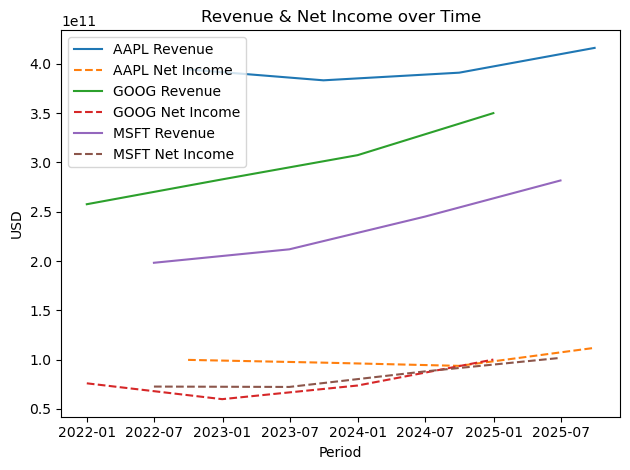

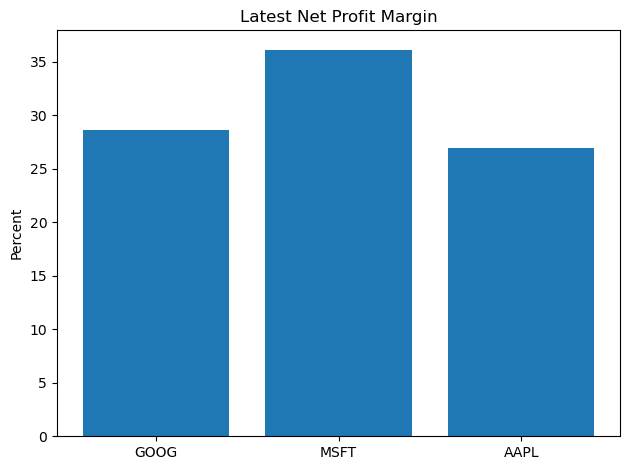

  Ticker     Period  Net Profit Margin       ROE  Debt to Equity
0   GOOG 2024-12-31           0.286037  0.329085        0.385045
1   MSFT 2025-06-30           0.361460  0.332808        0.802157
2   AAPL 2025-09-30           0.269151  1.714224        3.872187


In [68]:
# Visualizing Trends (matplotlib only)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Get the data (from variable 'km' if present; else from CSV)
if "km" not in locals():
    csv_path = r"D:\Financial Performance\clean\key_metrics.csv"
    if not os.path.exists(csv_path):
        raise FileNotFoundError("km not in memory and CSV not found at:\n" + csv_path)
    km = pd.read_csv(csv_path, parse_dates=["Period"])

# Basic hygiene
km["Period"] = pd.to_datetime(km["Period"], errors="coerce")
km = km.dropna(subset=["Period"]).sort_values(["Ticker", "Period"])

# Ensure required columns exist (compute if missing)
if "Net Profit Margin" not in km.columns and {"Net Income", "Revenue"}.issubset(km.columns):
    km["Net Profit Margin"] = km["Net Income"] / km["Revenue"]

if "ROE" not in km.columns and {"Net Income", "Shareholders Equity"}.issubset(km.columns):
    avg_eq = (km["Shareholders Equity"] + km["Shareholders Equity"].shift()) / 2
    km["ROE"] = km["Net Income"] / avg_eq.replace(0, np.nan)

if "Debt to Equity" not in km.columns and {"Total Liabilities", "Shareholders Equity"}.issubset(km.columns):
    km["Debt to Equity"] = km["Total Liabilities"] / km["Shareholders Equity"].replace(0, np.nan)

# — Line chart: Revenue & Net Income over time
fig, ax = plt.subplots()
for t in km["Ticker"].dropna().unique():
    kmt = km[km["Ticker"] == t].set_index("Period")
    ax.plot(kmt.index, kmt["Revenue"].values, label=f"{t} Revenue")
    ax.plot(kmt.index, kmt["Net Income"].values, linestyle="--", label=f"{t} Net Income")

ax.set_title("Revenue & Net Income over Time")
ax.set_xlabel("Period")
ax.set_ylabel("USD")
ax.legend()
plt.tight_layout()
plt.show()

# — Bar chart: latest Net Profit Margin by ticker
latest = km.sort_values("Period").groupby("Ticker", as_index=False).tail(1)

if "Net Profit Margin" in latest.columns:
    fig, ax = plt.subplots()
    vals = latest["Net Profit Margin"].values
    vals = vals * 100.0 if np.nanmax(vals) <= 1.0 else vals  # convert fraction -> %
    ax.bar(latest["Ticker"], vals)
    ax.set_title("Latest Net Profit Margin")
    ax.set_ylabel("Percent")
    plt.tight_layout()
    plt.show()

# — Table: ratios side-by-side (latest year)
cols = [c for c in ["Net Profit Margin", "ROE", "Debt to Equity"] if c in latest.columns]
table = latest[["Ticker", "Period"] + cols].reset_index(drop=True)
print(table)


# Insights

>Growth Profile:
-MSFT Net margin 36.1% > GOOG 28.6% > APPL 24.0%

>Profitability:
-MSFT: Best profitability (36%)with strong ROE ~33% and high quality earnings, balanced sheet.

>Capital efficiency (ROE):
-ROE reality check: AAPL 157% is inflated by a tiny equity base from massive buybacks and not economically comparable; On a like-for-like basis, MSFT ~33% ≈ GOOG ~33%.
-GOOG:Solid margins, ROE ~33%, and lowest levearge (~0.38).

>Leverage:
-Debt-to-equity + cash flow coverage.